# Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('boston.csv')

In [6]:
df.columns = df.columns.str.lower()

In [20]:
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax        float64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

# Find Unique datas

In [27]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print("\n")

crim
[0.00632 0.02731 0.02729 0.03237 0.06905]


zn
[18.   0.  12.5 75.  21. ]


indus
[2.31 7.07 2.18 7.87 8.14]


chas
[0 1]


nox
[0.538 0.469 0.458 0.524 0.499]


rm
[6.575 6.421 7.185 6.998 7.147]


age
[65.2 78.9 61.1 45.8 54.2]


dis
[4.09   4.9671 6.0622 5.5605 5.9505]


rad
[1 2 3 5 4]


tax
[296. 242. 222. 311. 307.]


ptratio
[15.3 17.8 18.7 15.2 21. ]


b
[396.9  392.83 394.63 394.12 395.6 ]


lstat
[4.98 9.14 4.03 2.94 5.33]


medv
[24.  21.6 34.7 33.4 36.2]




### Medv  Column (This is the median value of owner-occupied homes in $1000s and is often the target variable in regression problems.) ကို သုံးပြီးရှာကြမယ် 

# Distribution of MedV

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='medv', ylabel='Count'>

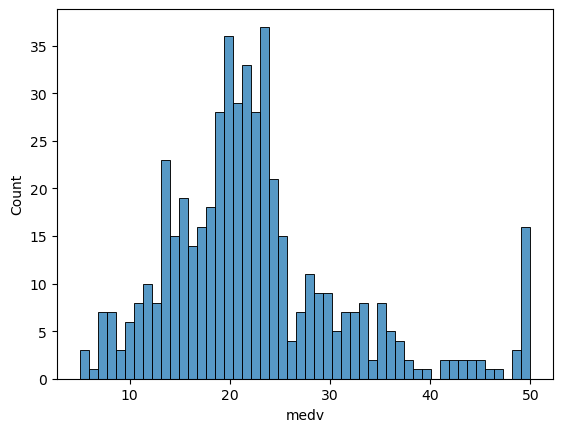

In [39]:
sns.histplot(df.medv,bins=50)

In [36]:
medv_log = np.log1p(df.medv)
medv_log

0      3.218876
1      3.117950
2      3.575151
3      3.538057
4      3.616309
         ...   
501    3.152736
502    3.072693
503    3.214868
504    3.135494
505    2.557227
Name: medv, Length: 506, dtype: float64

In [37]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

## Preparing the data set for training & testing & validation

In [46]:
n = len(df)
val_n = int(n * 0.2)
test_n = int(n*0.2)
train_n = n - val_n -test_n
test_n,val_n,train_n

(101, 101, 304)

In [64]:
df_train = df.iloc[:train_n]
df_val = df.iloc[train_n:train_n+val_n]
df_test = df.iloc[train_n+val_n:]
len(df_train) , len(df_val) , len(df_test)

(304, 101, 101)

## Shuffling Dataset

In [56]:
idx = np.arange(n)
df.iloc[1]
np.random.seed(2)
np.random.shuffle(idx)
df.iloc[[1,5,9,10]]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9
10,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311.0,15.2,392.52,20.45,15.0


In [72]:
df_train = df.iloc[idx[:train_n]]
df_train.reset_index(drop=True)

df_val = df.iloc[idx[train_n:train_n+ val_n]]
df_val.reset_index(drop=True)

df_test = df.iloc[idx[train_n+val_n:]]
df_test.reset_index(drop=True)
df_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
463,5.82115,0.0,18.10,0,0.713,6.513,89.9,2.8016,24,666.0,20.2,393.82,10.29,20.2
152,1.12658,0.0,19.58,1,0.871,5.012,88.0,1.6102,5,403.0,14.7,343.28,12.12,15.3
291,0.07886,80.0,4.95,0,0.411,7.148,27.7,5.1167,4,245.0,19.2,396.90,3.56,37.3
183,0.10008,0.0,2.46,0,0.488,6.563,95.6,2.8470,3,193.0,17.8,396.90,5.68,32.5
384,20.08490,0.0,18.10,0,0.700,4.368,91.2,1.4395,24,666.0,20.2,285.83,30.63,8.8


In [79]:
y_train=np.log1p(df_train.medv.values)
y_val=np.log1p(df_val.medv.values)
y_test = np.log1p(df_test.medv.values)

del df_train['medv']
del df_val['medv']
del df_test['medv']

# Train Baseline Model

In [80]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])

    # Normal Equation
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    w0 = w_full[0]
    w = w_full[1:]
    
    return w0,w

df_train.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax        float64
ptratio    float64
b          float64
lstat      float64
dtype: object

In [152]:
base = ['crim','age','rad','dis','tax','b','ptratio','lstat','chas','zn','nox','indus']

X_train = df_train[base].fillna(0).values
X_train
w0,w = train_linear_regression(X_train,y_train)
y_pred = w0 + X_train.dot(w)
w0,w

(5.0107921662072785,
 array([-1.30527073e-02,  8.69162113e-04,  1.72826902e-02, -6.13895187e-02,
        -6.84431327e-04,  1.62950903e-04, -3.77572292e-02, -3.33523238e-02,
         6.10293457e-02,  2.10710867e-03, -1.03277174e+00,  1.85110945e-03]))

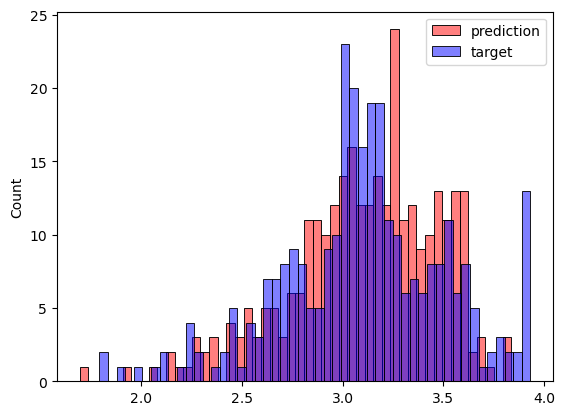

In [153]:
sns.histplot(y_pred, color='red', label="prediction", alpha=0.5, bins=50)
sns.histplot(y_train, color='blue',label="target", alpha=0.5, bins=50)
plt.legend()

In [155]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2 # (RealData - Predict Data) square
    mse = se.mean() # Mean ကိုရှာ
    return np.sqrt(mse) # ရတဲ့ Mean ကို Square Root လုပ်
    
rmse(y_train,y_pred)

0.18697766449671416

# Utilizing Model

In [162]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
X_full_train = df_full_train[base].fillna(0).values
X_full_train
y_full_train = np.concatenate([y_train, y_val])

w0,w = train_linear_regression(X_full_train,y_full_train)
w0,w

(4.875545482054168,
 array([-1.08420658e-02,  9.56270844e-04,  1.52243343e-02, -5.54993013e-02,
        -6.23407178e-04,  2.84303435e-04, -3.90903426e-02, -3.24263504e-02,
         9.50160526e-02,  1.87402752e-03, -9.14497871e-01,  1.75913584e-03]))

In [164]:
X_test = df_test[base].fillna(0).values
y_pred = w0+X_test.dot(w)
rmse(y_test,y_pred)

0.1729207285459242

In [174]:
house = df_test.iloc[10].to_dict()
df_small = pd.DataFrame([house])
df_small

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.02055,85.0,0.74,0.0,0.41,6.383,35.7,9.1876,2.0,313.0,17.3,396.9,5.77


In [175]:
X_small = df_small[base].fillna(0).values
y_pred = w0 + X_small.dot(w)
y_pred[0]

3.270005425675849

In [176]:
np.expm1(y_pred[0]) #predicted value of mdev

25.3114821004516